# Imports and Defaults

In [186]:
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt
import seaborn as sns

from ot.utils import dist0
from ot.datasets import make_1D_gauss
from ot.bregman import convolutional_barycenter2d, barycenter
from collections import defaultdict
from sklearn.datasets import fetch_openml
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots

In [208]:
path = '../writeup/images/q7'
seed = 0
rng = np.random.default_rng(seed)
plt.style.use('seaborn')

/var/folders/sm/j_xxwpn91bb8wdfzfy3mn5600000gn/T/ipykernel_12541/3557528550.py:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# MNIST Wasserstein

In [39]:
# Load data from https://www.openml.org/d/554
X, Y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")
n = X.shape[0]

# preprocess dataset
X = X.astype(float) # convert to float
X /= X.mean(axis=1)[:, np.newaxis] # normalize each image
X = X.reshape(n, 28, 28) # reshape to 28x28

# create dictionary of digit idicies
digit_dict = defaultdict(list)
for i, y in enumerate(Y):
    digit_dict[y].append(i)

In [86]:
reg = 0.004
n_images = 10

# iterate over digits
figure_list = []
for i in range(10):
    idx = digit_dict[str(i)]
    idx = idx[:n_images] # take first n_images
    barycenter = convolutional_barycenter2d(X[idx], reg=reg)
    
    fig = px.imshow(barycenter)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    
    fname = f'digit_{i}.png'
    fig.write_image(os.path.join(path, fname))
    fig.show()
    

# Tristen Code

(200, 4)


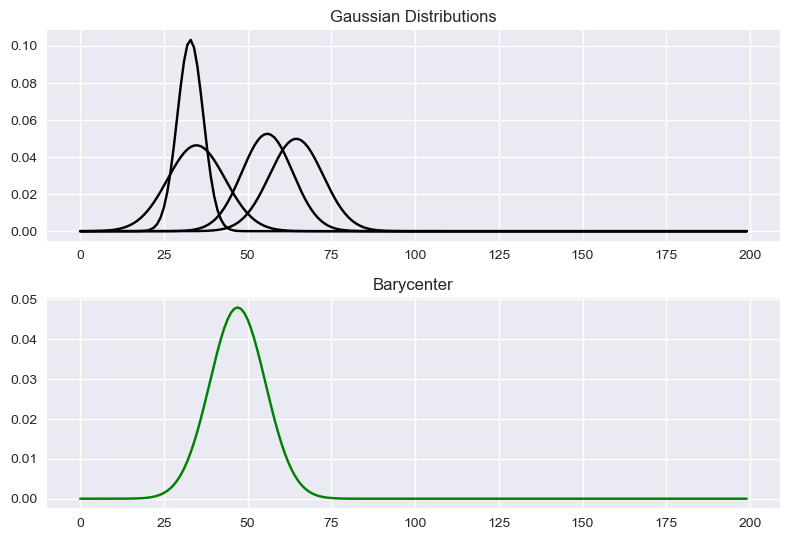

In [220]:
def generate_sum_of_gaussians(modes, granularity):
    means = np.random.uniform(20, 70, (modes))
    stddevs = np.random.uniform(2,10, (modes))
    data = []
    for m,s in zip(means, stddevs):
        data.append(make_1D_gauss(granularity, m, s))
    return np.asarray(data).transpose()

def average_gauss_wasserstein_space(modes, granularity):
    data = generate_sum_of_gaussians(modes, granularity)
    print(data.shape)
    reg = 1e-3
    M = dist0(granularity)
    M /= M.max()
    weights = np.ones((modes))/modes
    bary_wass = barycenter(data, M, reg)
    
    x = np.arange(granularity, dtype=np.float64)
    f, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True, num=1)
    ax1.plot(x, data, color="black")
    ax1.set_title('Gaussian Distributions')
    ax2.plot(x, bary_wass, 'g')
    ax2.set_title('Barycenter')
    plt.show()
    
average_gauss_wasserstein_space(4, 200)


# Gaussian Wasserstein

In [226]:
def generate_gaussians(n_gaussians, n_hist):
    res = []
    for _ in range(n_gaussians):
        mean = rng.uniform(20, 70)
        var = rng.uniform(2, 10)
        
        # x = rng.normal(mean, var, size=n_hist)
        x = make_1D_gauss(n_hist, mean, var)
        res.append(x)
    return np.asarray(res).T

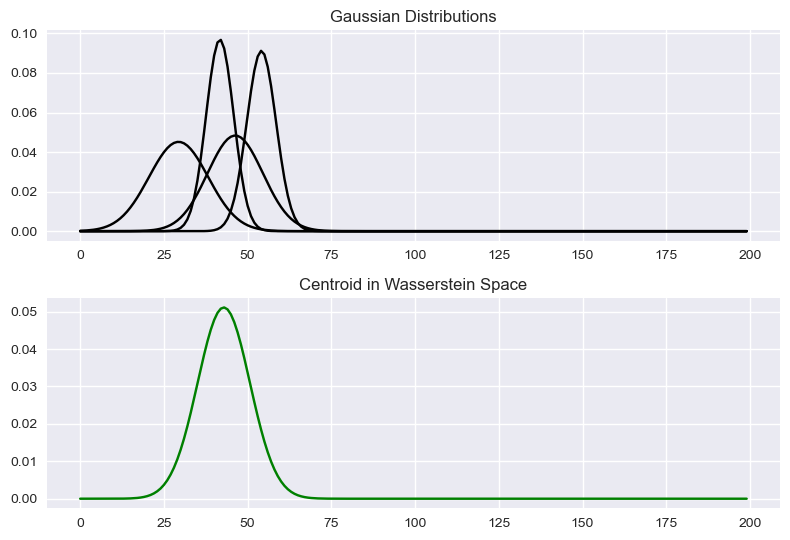

In [237]:
n_gaussians = 4
n_bins = 200
gaussian_list = generate_gaussians(n_gaussians, n_bins)

reg = 1e-3
M = dist0(n_bins)
M /= M.max()
weights = np.ones((n_gaussians))/n_gaussians
bary_wass = barycenter(gaussian_list, M, reg)

# plotting
x = np.arange(n_bins)
f, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True, num=1)
ax1.plot(x, gaussian_list, color="black")
ax1.set_title('Gaussian Distributions')
ax2.plot(x, bary_wass, 'g')
ax2.set_title('Centroid in Wasserstein Space')

fname = 'gaussian.png'
f.savefig(os.path.join(path, fname))
plt.show()

# Skip (For Now)

In [170]:
def sum_of_gaussians(n_gaussians, n_bins):
    gaussian_list = []
    total = 0
    
    # iterate over num gaussians
    for _ in range(n_gaussians):
        # sample mean and var
        mean = rng.uniform(100, 300)
        var = rng.uniform(10, 100)
        
         # histogram gaussian
        cur_gaussian = make_1D_gauss(n_bins, mean, var)
        total += cur_gaussian
        gaussian_list.append(cur_gaussian)
        
    return total, np.asarray(gaussian_list).T

n_gaussians = 4
n_bins = 500
total, gaussian_list = sum_of_gaussians(n_gaussians, n_bins) 
reg = 1e-3
M = dist0(n_bins)
M /= M.max()
weights = np.ones((n_gaussians))/n_gaussians
bary_wass = barycenter(gaussian_list, M, reg)

px.line(x=np.arange(n_bins), y=total, title='Sum of Gaussians')

(500, 4)
